
# Comparing random forests and the multi-output meta estimator

An example to compare multi-output regression with random forest and
the `multioutput.MultiOutputRegressor <multiclass>` meta-estimator.

This example illustrates the use of the
`multioutput.MultiOutputRegressor <multiclass>` meta-estimator
to perform multi-output regression. A random forest regressor is used,
which supports multi-output regression natively, so the results can be
compared.

The random forest regressor will only ever predict values within the
range of observations or closer to zero for each of the targets. As a
result the predictions are biased towards the centre of the circle.

Using a single underlying feature the model learns both the
x and y coordinate as output.


In [7]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor




raw_dataset = pd.read_csv("insurance_dataset.csv", sep=',',decimal='.')
dataset = raw_dataset.copy()
dataset = dataset.sample(frac=0.01, random_state=42)
from sklearn.preprocessing import LabelEncoder
# Define ordinal mappings for ordinal variables
ordinal_mappings = {
    "occupation": {"Unemployed": 0, "Student": 1, "Blue collar": 2, "White collar": 3},
    "coverage_level": {"Basic": 0, "Standard": 1, "Premium": 2}
}
# Apply ordinal encoding to ordinal variables
dataset.replace(ordinal_mappings, inplace=True)
# For non-ordinal variables, you can use regular label encoding
label_encoder = LabelEncoder()
non_ordinal_columns = ['gender', 'smoker', 'medical_history', 'family_medical_history','exercise_frequency']
for column in non_ordinal_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])


X = dataset[['age', 'gender', 'bmi', 'children', 'smoker', 'medical_history', 
             'family_medical_history', 'exercise_frequency', 'occupation']]
y_charges = dataset['charges'].values.reshape(-1, 1)  # Reshape to a 2D array
y_coverage = dataset['coverage_level'].values.reshape(-1, 1)  # Reshape to a 2D array




X_train, X_test, y_charges_train, y_charges_test = train_test_split(
    X, y_charges, test_size=0.2, random_state=42)
X_train, X_test, y_coverage_train, y_coverage_test = train_test_split(
    X, y_coverage, test_size=0.2, random_state=42)

max_depth = 30
regr_multirf = MultiOutputRegressor(
    RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
)
regr_multirf.fit(X_train, np.hstack((y_charges_train, y_coverage_train)))
print("Shape of X_train:", X_train.shape)
y_train = np.concatenate((y_charges_train, y_coverage_train), axis=1)
y_test = np.concatenate((y_charges_test, y_coverage_test), axis=1)
print("Shape of y_train:", y_train.shape)



Shape of X_train: (8000, 9)
Shape of y_train: (8000, 2)


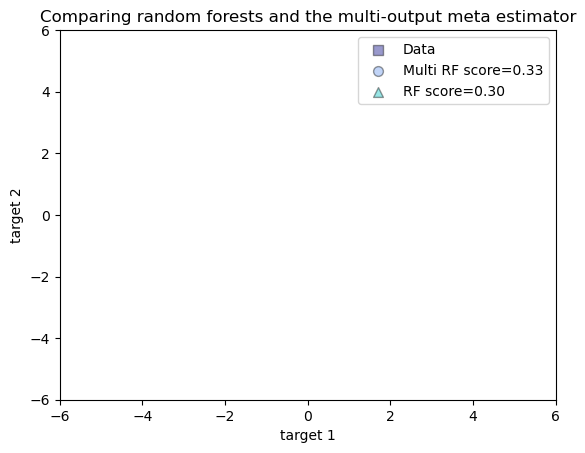

In [8]:
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(
    y_test[:, 0],
    y_test[:, 1],
    edgecolor="k",
    c="navy",
    s=s,
    marker="s",
    alpha=a,
    label="Data",
)
plt.scatter(
    y_multirf[:, 0],
    y_multirf[:, 1],
    edgecolor="k",
    c="cornflowerblue",
    s=s,
    alpha=a,
    label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test),
)
plt.scatter(
    y_rf[:, 0],
    y_rf[:, 1],
    edgecolor="k",
    c="c",
    s=s,
    marker="^",
    alpha=a,
    label="RF score=%.2f" % regr_rf.score(X_test, y_test),
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()